<a href="https://colab.research.google.com/github/Siphesihle13/MoodRecommendationSystem/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Music Mood Classification using GMM \\
Compiled by: Siphesihle Ndhlovu (1599603)

In [48]:
!pip install pgmpy
!pip install matplotlib

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/comm

In [49]:
!pip install bnlearn

In [50]:
#from google.colab import files
#uploaded=files.upload()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
import pandas as pd
from pgmpy.models import BayesianModel
import seaborn as sns
import bnlearn as bn

import io

In [52]:
from sklearn.cluster import KMeans


In [53]:
#spotify_df = pd.read_csv(io.BytesIO(uploaded['data_o.csv']))

spotify_df = pd.read_csv('data_o.csv')

spotify_df=spotify_df.drop("id",axis=1)

In [54]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   instrumentalness  170653 non-null  float64
 9   key               170653 non-null  int64  
 10  liveness          170653 non-null  float64
 11  loudness          170653 non-null  float64
 12  mode              170653 non-null  int64  
 13  name              170653 non-null  object 
 14  popularity        170653 non-null  int64  
 15  release_date      170653 non-null  object 
 16  speechiness       17

In [55]:
spotify_df.corr()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191813,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079713,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139937,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_ms,-0.191813,0.079713,-0.076373,-0.139937,1.000000,0.042119,-0.048880,0.084770,-0.004266,0.047168,-0.003037,-0.046085,0.059597,-0.084604,-0.025472
energy,0.353876,0.530272,-0.749393,0.221967,0.042119,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048880,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084770,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047168,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


In [56]:
spotify_df=spotify_df.drop(["year",  "duration_ms", "explicit","mode","key","popularity", "release_date"],axis=1)


In [57]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   acousticness      170653 non-null  float64
 2   artists           170653 non-null  object 
 3   danceability      170653 non-null  float64
 4   energy            170653 non-null  float64
 5   instrumentalness  170653 non-null  float64
 6   liveness          170653 non-null  float64
 7   loudness          170653 non-null  float64
 8   name              170653 non-null  object 
 9   speechiness       170653 non-null  float64
 10  tempo             170653 non-null  float64
dtypes: float64(9), object(2)
memory usage: 14.3+ MB


In [58]:
x_train=((spotify_df[150000:160001]).reset_index()).drop(["index"], axis =1)
x_test=spotify_df[160001:]

x_train.head()

,valence,acousticness,artists,danceability,energy,instrumentalness,liveness,loudness,name,speechiness,tempo
0,0.6520,0.280000,['Tom Petty and the Heartbreakers'],0.703,0.536,0.000000,0.1700,-10.523,Built To Last,0.0271,110.946
1,0.4570,0.864000,"['Francisco Tárrega', 'Julian Bream']",0.196,0.211,0.836000,0.0936,-24.619,Recuerdos de la Alhambra,0.0435,148.681
2,0.0642,0.000256,['Nirvana'],0.271,0.959,0.854000,0.0858,-5.866,"Endless, Nameless",0.1250,131.846
3,0.1190,0.745000,['Manuel & The Music Of The Mountains'],0.228,0.346,0.881000,0.1850,-10.995,Moonglow and Theme from Picnic,0.0309,81.718
4,0.7420,0.004280,['Rod Stewart'],0.619,0.956,0.000035,0.0604,-6.886,It Takes Two - 2008 Remaster,0.0648,141.221


In [59]:
x_trainC=x_train.iloc[:,[0,1,3,4,5,6,7,9,10]]
cols=x_trainC.columns

In [60]:

x_trainC.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.6520,0.280000,0.703,0.536,0.000000,0.1700,-10.523,0.0271,110.946
1,0.4570,0.864000,0.196,0.211,0.836000,0.0936,-24.619,0.0435,148.681
2,0.0642,0.000256,0.271,0.959,0.854000,0.0858,-5.866,0.1250,131.846
3,0.1190,0.745000,0.228,0.346,0.881000,0.1850,-10.995,0.0309,81.718
4,0.7420,0.004280,0.619,0.956,0.000035,0.0604,-6.886,0.0648,141.221


In [61]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [62]:
scaled = pd.DataFrame(scaler.fit_transform(x_trainC))
scaled.columns = cols

In [63]:
scaled.head()

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.655936,0.281124,0.715158,0.536537,0.000000,0.170854,0.804727,0.027967,0.507913
1,0.459759,0.867470,0.199390,0.211211,0.836000,0.094070,0.575460,0.044892,0.680665
2,0.064588,0.000257,0.275687,0.959960,0.854000,0.086231,0.880471,0.128999,0.603594
3,0.119718,0.747992,0.231943,0.346346,0.881000,0.185930,0.797050,0.031889,0.374107
4,0.746479,0.004297,0.629705,0.956957,0.000035,0.060704,0.863881,0.066873,0.646513


In [64]:
scaled= scaler.fit_transform(x_trainC)

GMM Model

BIC Score

In [65]:

n_components = range(1, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
scoreB=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        gmm.fit(scaled)
        scoreB.append((cov,n_comp,gmm.bic(scaled)))
score_1B = pd.DataFrame(scoreB)
score_1B.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2B = score_1B[score_1B.BIC_Score == score_1B.BIC_Score.min()]



In [66]:
score_1B

,Covariance_Type,N_Components,BIC_Score
0,spherical,1,12.638432
1,spherical,2,-26372.510481
2,spherical,3,-39625.506306
3,spherical,4,-45041.138576
4,spherical,5,-53017.527944
...,...,...,...
111,full,25,-175113.043273
112,full,26,-174276.563750
113,full,27,-175156.605672
114,full,28,-174303.025551


In [67]:
score_2B

,Covariance_Type,N_Components,BIC_Score
113,full,27,-175156.605672


Text(0.5, 1.0, 'BIC Score of a number of GMM Components')

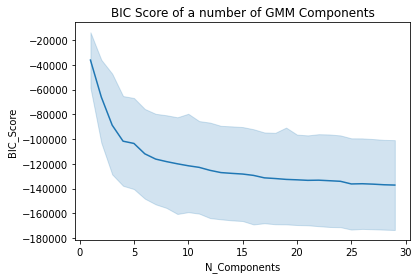

In [68]:
sns.lineplot(data=score_1B,x="N_Components", y="BIC_Score").set_title("BIC Score of a number of GMM Components")

Silhouette Score

In [69]:
from sklearn.metrics import silhouette_score 

In [70]:
n_components = range(2, 40)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 10)
        model = gmm.fit(scaled)
        model_2 = model.predict(scaled)
        score_s = silhouette_score(scaled, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]


In [ ]:
score_1

In [ ]:
score_2

In [ ]:
sns.lineplot(data=score_1,x="N_Components", y="Silhouette_Score").set_title("Silhouette Score of different number of GMM Components")

Now let's apply suggested clusters

In [91]:
gmm = GaussianMixture(27, 
                     covariance_type='full', 
                     random_state=0).fit(scaled)
#plt.scatter(x_train[:, 0], x_train[:, 1], c=labels, s=40, cmap='viridis');



In [92]:
labels = gmm.predict(scaled)
labels

array([ 8,  3, 23, ...,  8, 25, 12])

In [93]:
# converting preditcions into a df
gmmL = pd.DataFrame(data=labels, dtype=int)
gmmL.columns = ['GMM_Cluster']

# predictions as a df
print(gmmL.shape)
gmmL.tail()

(10001, 1)


,GMM_Cluster
9996,12
9997,12
9998,8
9999,25
10000,12


In [94]:
x_trainC.shape

(10001, 10)

In [95]:
x_trainC["GMM_Clusters"] =gmmL["GMM_Cluster"]

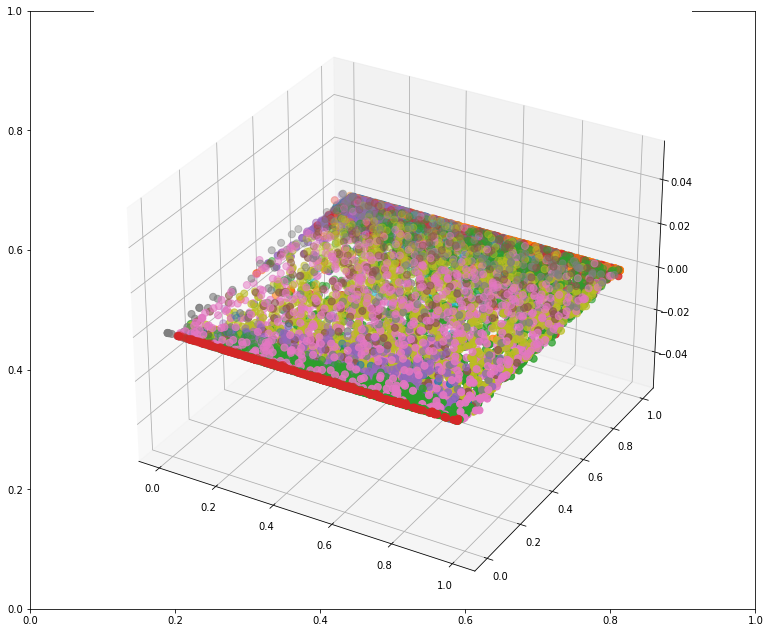

In [96]:
fig, ax = plt.subplots(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')

plt.scatter(scaled[labels == 0,0],scaled[labels == 0,1], s= 50, label= 'Cluster 1')
plt.scatter(scaled[labels == 1,0], scaled[labels == 1,1], s= 50,  label= 'Cluster 2')
plt.scatter(scaled[labels == 2,0], scaled[labels == 2,1], s= 50, label= 'Cluster 3')
plt.scatter(scaled[labels == 3,0], scaled[labels == 3,1], s= 50,  label= 'Cluster 4')
plt.scatter(scaled[labels == 4,0], scaled[labels == 4,1], s= 50, label= 'Cluster 5')
plt.scatter(scaled[labels == 5,0],scaled[labels == 5,1], s= 50, label= 'Cluster 6')
plt.scatter(scaled[labels == 6,0], scaled[labels == 6,1], s= 50, label= 'Cluster 7')
plt.scatter(scaled[labels == 7,0], scaled[labels == 7,1], s= 50, label= 'Cluster 8')
plt.scatter(scaled[labels == 8,0], scaled[labels == 8,1], s= 50, label= 'Cluster 9')
plt.scatter(scaled[labels == 9,0],scaled[labels == 9,1], s= 50, label= 'Cluster 10')
plt.scatter(scaled[labels == 10,0], scaled[labels == 10,1], s= 50, label= 'Cluster 11')
plt.scatter(scaled[labels == 11,0], scaled[labels == 11,1], s= 50, label= 'Cluster 12')
plt.scatter(scaled[labels == 12,0], scaled[labels == 12,1], s= 50, label= 'Cluster 13')
plt.scatter(scaled[labels == 13,0],scaled[labels == 13,1], s= 50,label= 'Cluster 14')
plt.scatter(scaled[labels == 14,0], scaled[labels == 14,1], s= 50, label= 'Cluster 15')
plt.scatter(scaled[labels == 15,0], scaled[labels == 15,1], s= 50, label= 'Cluster 6')
plt.scatter(scaled[labels == 16,0], scaled[labels == 16,1], s= 50, label= 'Cluster 17')
plt.scatter(scaled[labels == 17,0], scaled[labels == 17,1], s= 50, label= 'Cluster 18')
plt.scatter(scaled[labels == 18,0], scaled[labels == 18,1], s= 50, label= 'Cluster 19')
plt.scatter(scaled[labels == 19,0], scaled[labels == 19,1], s= 50, label= 'Cluster 20')
plt.scatter(scaled[labels == 20,0],scaled[labels == 20,1], s= 50, label= 'Cluster 21')
plt.scatter(scaled[labels == 21,0], scaled[labels == 21,1], s= 50, label= 'Cluster 22')
plt.scatter(scaled[labels == 22,0], scaled[labels == 22,1], s= 50, label= 'Cluster 23')
plt.scatter(scaled[labels == 23,0], scaled[labels == 23,1], s= 50, label= 'Cluster 24')
plt.scatter(scaled[labels == 24,0],scaled[labels == 24,1], s= 50, label= 'Cluster 25')
plt.scatter(scaled[labels == 25,0], scaled[labels == 25,1], s= 50, label= 'Cluster 26')
plt.scatter(scaled[labels == 26,0], scaled[labels == 26,1], s= 50, label= 'Cluster 27')


Random Forest

In [80]:
x_trainC.iloc[:,:-1]

,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,0.6520,0.280000,0.703,0.536,0.000000,0.1700,-10.523,0.0271,110.946
1,0.4570,0.864000,0.196,0.211,0.836000,0.0936,-24.619,0.0435,148.681
2,0.0642,0.000256,0.271,0.959,0.854000,0.0858,-5.866,0.1250,131.846
3,0.1190,0.745000,0.228,0.346,0.881000,0.1850,-10.995,0.0309,81.718
4,0.7420,0.004280,0.619,0.956,0.000035,0.0604,-6.886,0.0648,141.221
...,...,...,...,...,...,...,...,...,...
9996,0.4860,0.076000,0.471,0.572,0.003210,0.1070,-11.726,0.0482,136.590
9997,0.8160,0.617000,0.749,0.333,0.000346,0.0806,-10.627,0.0521,115.754
9998,0.6310,0.276000,0.518,0.484,0.000041,0.0979,-9.342,0.0254,73.304
9999,0.5940,0.826000,0.512,0.437,0.000000,0.3440,-15.390,0.1990,134.039


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [82]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(x_trainC.iloc[:,:-1], x_trainC.iloc[:,-1])


RandomForestClassifier(max_depth=5)

K-Means

Accuracy

In [86]:
#KMeans
#Silhouette Score
n_components = range(2, 30)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        kmeans = KMeans(n_comp)
        kmeans.fit(scaled)
        pred = kmeans.predict(scaled)
        score_s = silhouette_score(scaled, pred, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]


In [87]:
score_2

,Covariance_Type,N_Components,Silhouette_Score
84,full,2,0.315127


In [ ]:
!pip install pyvis

DAG:

In [ ]:
x_train.columns
# bn.structure_learning.fit(x_train)
#print(DAG['adjmat'])

In [ ]:
edges=[('GMM_Clusters', 'valence'),
       ('GMM_Clusters','acousticness'),
       ('GMM_Clusters','speechiness'),
       ('GMM_Clusters','danceability'),
       ('GMM_Clusters', 'energy'),
       ('GMM_Clusters','instrumentalness'),
       ('GMM_Clusters','liveness'),
       ('GMM_Clusters','loudness'),
       ('GMM_Clusters','tempo')]

In [ ]:
DAG = bn.make_DAG(edges)
bn.plot(DAG)


In [ ]:
model_mle = bn.parameter_learning.fit(DAG, x_train, methodtype='maximumlikelihood')

In [ ]:
bn.print_CPD(model_mle)

Making Bayesian Inferences

In [ ]:
model = bn.parameter_learning.fit(DAG, x_train, methodtype='maximumlikelihood')
bn.print_CPD(model)


In [ ]:

q1 = bn.inference.fit(model, variables=['GMM_Clusters'], evidence={'Sprinkler':0})
print(q1.df)